In [1]:
from pseudowalls import *
%display latex

# Initialize Cherns

In [2]:
var("R C D r c d A B", domain="real")
P = A, B

In [3]:
v = Chern_Char(R,C,D)
v

In [4]:
twisted_v = Twisted_Chern_Char(B,
            R,
            var("twisted_v1", latex_name = r"\mathrm{ch}_1^B(v)", domain="real"),
            var("twisted_v2", latex_name = r"\mathrm{ch}_2^B(v)", domain="real"),
)
twisted_v

In [5]:
u = Chern_Char(r,c,d)
u

In [6]:
twisted_u = Twisted_Chern_Char(B,
            r,
            var("twisted_u1", latex_name = r"\mathrm{ch}_1^B(u)", domain="real"),
            var("twisted_u2", latex_name = r"\mathrm{ch}_2^B(u)", domain="real"),
)
twisted_u

# Numerical Conditions

Condition of $P = (A,B)$ being on $\Theta_v$ (i.e. $ch_2^{A,B}(v) = 0$) expressed in terms of twisted Chern character for $v$ at $\beta=B$:

In [7]:
A2_subs = solve(
    stability.Tilt(*P).degree(twisted_v) == 0,
    A^2)[0]

A2_subs

A^2 == 2*twisted_v2/R

## Condition: $ch_2^{P}(u) > 0$

In [8]:
stability.Tilt(*P).degree(twisted_u) > 0

-1/2*A^2*r + twisted_u2 > 0

In [9]:
radius_condition = expand(
    (stability.Tilt(*P).degree(twisted_u) / r > 0).expand().subs(
        A2_subs
    ) * r * R
)
radius_condition

R*twisted_u2 - r*twisted_v2 > 0

In [10]:
from plots_and_expressions import c_in_terms_of_q, beta
radius_condition_d_bound = (
    radius_condition
    .subs(twisted_u.ch[2] == u.twist(B).ch[2])
    .expand()
    .add_to_both_sides(B*R*c - B^2*R*r/2 + r*twisted_v.ch[2])
    .divide_both_sides(R)
    .subs(c_in_terms_of_q.subs(beta==B))
    .expand()
)
radius_condition_d_bound

d > 1/2*B^2*r + B*q + r*twisted_v2/R

## Condition: $\Delta(u) \geq 0$

In [38]:
from plots_and_expressions import bgmlv2_d_upperbound_terms

In [40]:
(bgmlv2_d_upperbound_terms.linear
 + bgmlv2_d_upperbound_terms.const
 + bgmlv2_d_upperbound_terms.hyperbolic)

1/2*beta^2*r + beta*q + 1/2*q^2/r

## Condition: $\Delta(v-u) \geq 0$

In [61]:
from plots_and_expressions import bgmlv3_d_upperbound_terms, ch1bv, ch2bv, q

(bgmlv3_d_upperbound_terms.linear
 + bgmlv3_d_upperbound_terms.const
 + bgmlv3_d_upperbound_terms.hyperbolic)

1/2*B^2*r + B*q - 1/2*(q - twisted_v1)^2/(R - r) + twisted_v2

### Specialize last 2 conditions to $\beta=B$

In [32]:
# substitutions to replace beta -> B in relevant equations to specialize to problem 1
beta_substitutions = [beta==B, ch1bv==twisted_v.ch[1], ch2bv==twisted_v.ch[2]]

1/2*beta^2*r + beta*q - 1/2*(ch1bv - q)^2/(R - r) + ch2bv

In [118]:
for terms in [bgmlv2_d_upperbound_terms, bgmlv3_d_upperbound_terms]:
    terms.const = terms.const.subs(beta_substitutions)
    terms.linear = terms.linear.subs(beta_substitutions)
    terms.hyperbolic = terms.hyperbolic.subs(beta_substitutions)
    terms.all = terms.const + terms.linear + terms.hyperbolic

In [43]:
bgmlv3_d_upperbound_terms.linear

1/2*B^2*r

In [44]:
bgmlv2_d_upperbound_terms.linear

1/2*B^2*r

# Example bounds

In [48]:
from plots_and_expressions import v_example, beta_minus
v_example

In [88]:
B_example = -2/3 - 1/99 # anything less than -2/3

In [89]:
v_example_twisted = v_example.twist(B_example)
v_example_twisted

In [110]:
q_example = 2

In [111]:
example_substitutions = [
    B == B_example,
    twisted_v.ch[0] == v_example_twisted.ch[0],
    twisted_v.ch[1] == v_example_twisted.ch[1],
    twisted_v.ch[2] == v_example_twisted.ch[2],
    q == q_example
]

In [112]:
example_upperbound_1 = (bgmlv3_d_upperbound_terms.linear
 + bgmlv3_d_upperbound_terms.const
 + bgmlv3_d_upperbound_terms.hyperbolic).subs(example_substitutions)
example_upperbound_1

4489/19602*r + 4489/2178/(r - 3) - 8579/6534

In [113]:
example_upperbound_2 = (bgmlv2_d_upperbound_terms.linear
 + bgmlv2_d_upperbound_terms.const
 + bgmlv2_d_upperbound_terms.hyperbolic).subs(example_substitutions)
example_upperbound_2

4489/19602*r + 2/r - 134/99

In [114]:
example_lowerbound_1 = radius_condition_d_bound.subs(example_substitutions).rhs()
example_lowerbound_1

2377/9801*r - 134/99

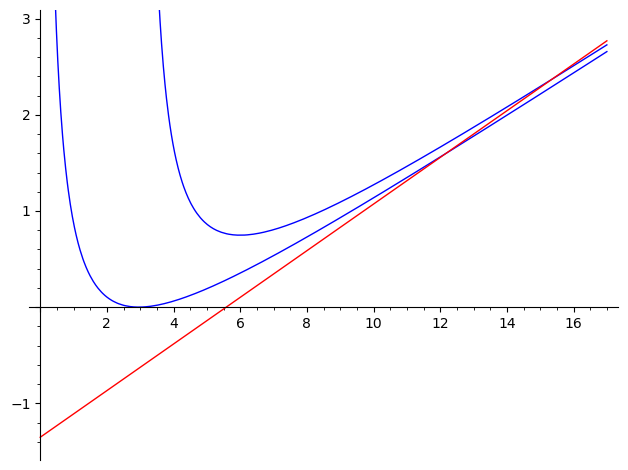

In [115]:
r_range = r,0,17

example_plot = (
    plot(example_upperbound_1, (r,3,17))
    + plot(example_upperbound_2, (r,0,17))
    + plot(example_lowerbound_1, r_range, rgbcolor="red")
)
example_plot.ymin(-1.5)
example_plot.ymax(3)
example_plot

# Finding intersection points

In [132]:
(
    ( bgmlv2_d_upperbound_terms.all == radius_condition_d_bound.rhs() )
    .subtract_from_both_sides(B^2*r/2 + B*q)
    .multiply_both_sides(r * R)
    .divide_both_sides(twisted_v.ch[2])
)

1/2*R*q^2/twisted_v2 == r^2

In [137]:
var("r_alt")

r_alt

In [166]:
(
    ( bgmlv3_d_upperbound_terms.all == radius_condition_d_bound.rhs() )
    .subtract_from_both_sides(B^2*r/2 + B*q + r*twisted_v.ch[2]/R)
    .subs(r == r_alt + R)
    .multiply_both_sides(R*r_alt) # assumes r>R
    .expand()
    .subs(r_alt == r - R)
    .expand()
).lhs().poly(r).roots()


[(1/4*(q^2 - 2*q*twisted_v1 + twisted_v1^2 + 4*r*twisted_v2 + sqrt(q^2 - 2*q*twisted_v1 + twisted_v1^2 + 8*r*twisted_v2)*(q - twisted_v1))/twisted_v2,
  1),
 (1/4*(q^2 - 2*q*twisted_v1 + twisted_v1^2 + 4*r*twisted_v2 - sqrt(q^2 - 2*q*twisted_v1 + twisted_v1^2 + 8*r*twisted_v2)*(q - twisted_v1))/twisted_v2,
  1)]

## rational B, involving epsilon

In [184]:
var("epsilon", latex_name=r"\varepsilon")
(
    ( bgmlv2_d_upperbound_terms.all - radius_condition_d_bound.rhs() - epsilon )
      .__mul__(r * R)
      .expand()
      .poly(r)
      .roots(r)

)

[(-1/2*(R*epsilon + sqrt(R^2*epsilon^2 + 2*R*q^2*twisted_v2))/twisted_v2, 1),
 (-1/2*(R*epsilon - sqrt(R^2*epsilon^2 + 2*R*q^2*twisted_v2))/twisted_v2, 1)]